<a href="https://colab.research.google.com/github/rubbybbs/ProbML-book-solution/blob/main/ch14/14.7.9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 14.7.9
给定二维空间的高斯分布$p(\mathbf x) = \mathcal N(0, \Sigma)$，其中$\Sigma_{ii}=1$，$\Sigma_{ij}=0.95,~i\neq j$。假设HMC算法采用动能函数$K(\mathbf r) = \mathbf r^\top \mathbf r / 2$，实现HMC算法，并画图分别显示$\mathbf x$变量和$\mathbf r$变量的演化过程。

Text(0.5, 1.0, 'Change of variable $r$ within one leapfrog update')

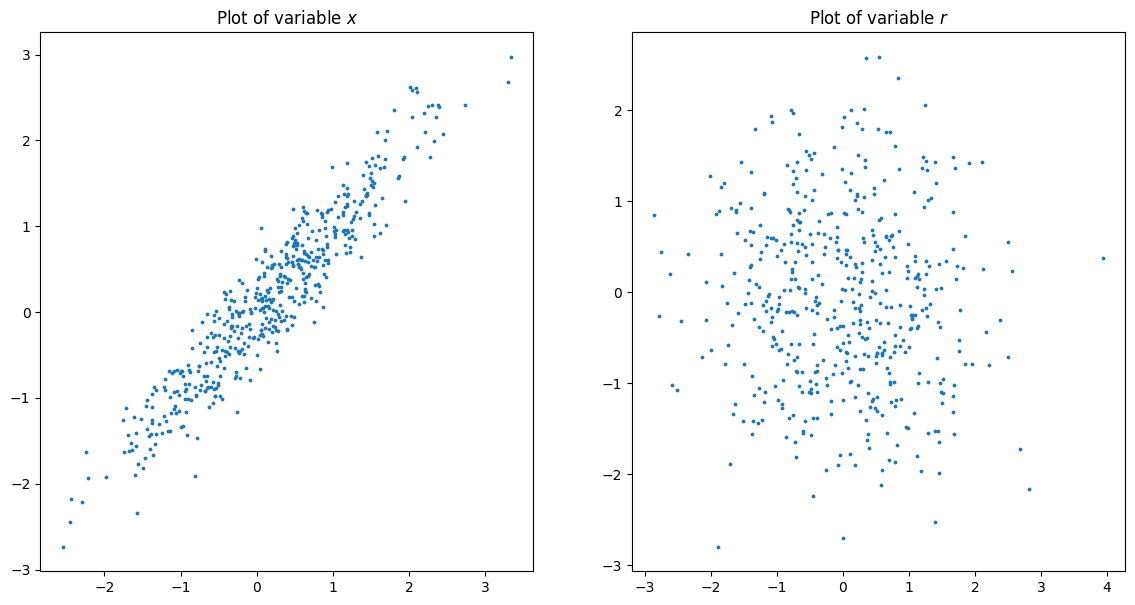

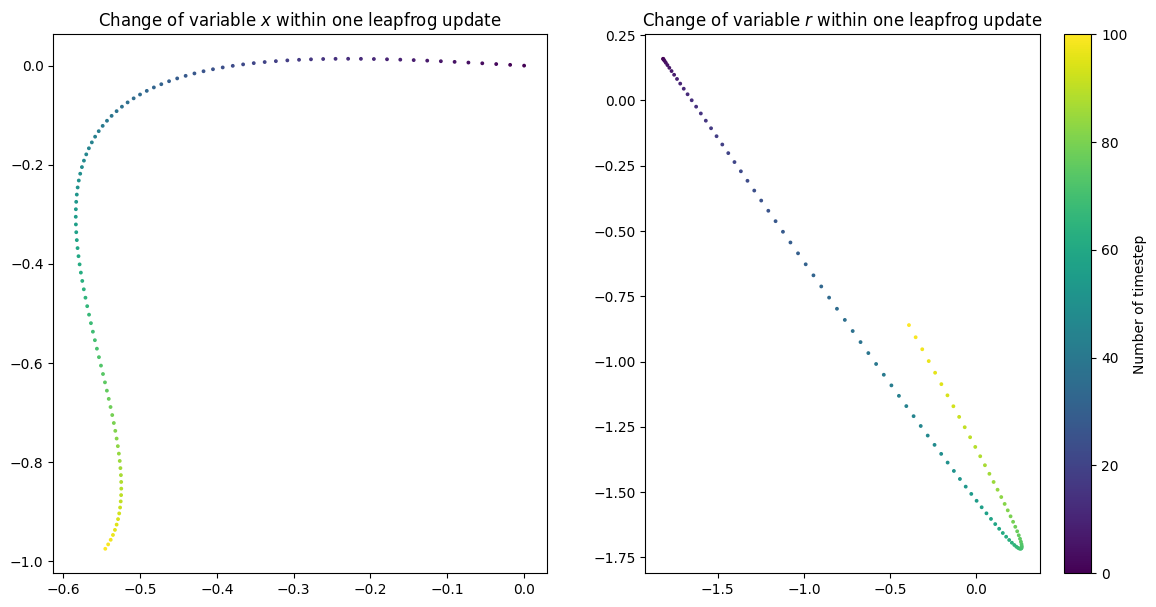

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def potential_energy(x, Sigma):
    return 0.5 * x @ np.linalg.inv(Sigma) @ x

def kinetic_energy(r):
    return 0.5 * np.dot(r, r)

def gradient_potential_energy(x, Sigma):
    return np.linalg.inv(Sigma) @ x

def leapfrog(x, r, Sigma, step_size, num_steps, record=False):
    x_new = x
    r_new = r
    if record:
        x_leapfrog.append(x_new)
        r_leapfrog.append(r_new)
    for _ in range(num_steps):
        r_new = r_new - 0.5 * step_size * gradient_potential_energy(x_new, Sigma)
        x_new = x_new + step_size * r_new
        r_new = r_new - 0.5 * step_size * gradient_potential_energy(x_new, Sigma)
        if record:
            x_leapfrog.append(x_new)
            r_leapfrog.append(r_new)
    return x_new, r_new

def hmc(Sigma, step_size, num_steps, num_samples):
    dim = Sigma.shape[0]
    x_samples = []
    r_samples = []
    x = np.zeros(dim)
    for _ in range(num_samples):
        r = np.random.normal(size=dim)
        if _ == 0:
            x_new, r_new = leapfrog(x, r, Sigma, step_size, num_steps, record=True)
        else:
            x_new, r_new = leapfrog(x, r, Sigma, step_size, num_steps)
        old_energy = potential_energy(x, Sigma) + kinetic_energy(r)
        new_energy = potential_energy(x_new, Sigma) + kinetic_energy(r_new)
        if np.random.uniform() < np.exp(old_energy - new_energy):
            x = x_new
            r = r_new
        x_samples.append(x)
        r_samples.append(r)
    return np.array(x_samples), np.array(r_samples)

# Set parameters
Sigma = np.array([[1, 0.95], [0.95, 1]])
step_size = 0.01
num_steps = 100
num_samples = 500

x_leapfrog, r_leapfrog = [], []

# Run HMC and plot
x_samples, r_samples = hmc(Sigma, step_size, num_steps, num_samples)

x_leapfrog = np.array(x_leapfrog)
r_leapfrog = np.array(r_leapfrog)

# Create figure for plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))


ax1.scatter(x_samples[:, 0], x_samples[:, 1], s=3)
ax2.scatter(r_samples[:, 0], r_samples[:, 1], s=3)


ax1.set_title(r'Plot of variable $x$')
ax2.set_title(r'Plot of variable $r$')

# Create figure for plotting in within the leapfrog update for a sample.
fig2, (ax3, ax4) = plt.subplots(1, 2, figsize=(14, 7))
t = np.arange(num_steps+1)
ax3.scatter(x_leapfrog[:, 0], x_leapfrog[:, 1], s=3, c=t, cmap='viridis')
map1 = ax4.scatter(r_leapfrog[:, 0], r_leapfrog[:, 1], s=3, c=t, cmap='viridis')
cbar = fig2.colorbar(map1, ax=ax4)
cbar.set_label("Number of timestep")

ax3.set_title(r'Change of variable $x$ within one leapfrog update')
ax4.set_title(r'Change of variable $r$ within one leapfrog update')

